In [1]:
import os
import sys
from glob import glob

sys.path.insert(0, "..")
import RRE_utils as ut

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MODEL_DIR = "/lustre/lrspec/users/2649/models/FortinoRRE"

In [3]:
# Calculate random guess probabiity for each type/age class, then aggregate to
# get the random guess probability for each subtype. Don't do it the otherway
# around, that ain't right.

# Need the fraction of each class in the training set, and then the fraction
# of each class in the testing set.
dataset_dir = os.path.join(MODEL_DIR, str(738), "training_set")

Ytst = np.load(
    os.path.join(dataset_dir, "testLabels.npy"))
Ytrn = np.load(
    os.path.join(dataset_dir, "trainLabels.npy"))

typeNamesList = np.load(
    os.path.join(dataset_dir, "typeNamesList.npy"))

In [4]:
agetypes, agetypes_cnt = np.unique(Ytrn, return_counts=True)
subtypes = ut.agetype_to_subtype(agetypes, typeNamesList)

subtypes_cnt_trn = {SNtype: 0 for SNtype in ut.SNtypes_int}

# Calculate totals for each subtype
tot = 0
for subtype, agetype_cnt in zip(subtypes, agetypes_cnt):
    tot += agetype_cnt
    subtypes_cnt_trn[subtype] += agetype_cnt
assert tot == agetypes_cnt.sum()

# Calculate fractions from the totals
tot = 0
for subtype, count in subtypes_cnt_trn.items():
    subtypes_cnt_trn[subtype] /= Ytrn.size
    tot += subtypes_cnt_trn[subtype]
print(tot)
subtypes_cnt_trn

0.9999999999999999


{0: 0.5431135388216933,
 1: 0.08583690987124463,
 2: 0.05774483027701912,
 3: 0.0015606710885680843,
 4: 0.017557549746390948,
 5: 0.010534529847834569,
 6: 0.05540382364416699,
 7: 0.00351150994927819,
 8: 0.07725321888412018,
 9: 0.0019508388607101053,
 10: 0.06320717908700742,
 11: 0.06632852126414358,
 12: 0.009754194303550527,
 13: 0.00351150994927819,
 14: 0.0015606710885680843,
 15: 0.0011705033164260631,
 16: 0.0}

In [5]:
broadtypes_cnt_trn = {bt: 0 for bt in ut.SNbroadtypes_int}

for SNtype in ut.SNtypes_int:
    bt = ut.get_broad_type(SNtype).item()
    broadtypes_cnt_trn[bt] += subtypes_cnt_trn[SNtype]
broadtypes_cnt_trn

{0: 0.7163480296527506,
 1: 0.13811939133827544,
 2: 0.13928989465470154,
 3: 0.006242684354272337}

In [6]:
agetypes, agetypes_cnt = np.unique(Ytst, return_counts=True)
subtypes = ut.agetype_to_subtype(agetypes, typeNamesList)

subtypes_cnt_tst = {SNtype: 0 for SNtype in ut.SNtypes_int}

# Calculate totals for each subtype
tot = 0
for subtype, agetype_cnt in zip(subtypes, agetypes_cnt):
    tot += agetype_cnt
    subtypes_cnt_tst[subtype] += agetype_cnt
assert tot == agetypes_cnt.sum()

# Calculate fractions from the totals
tot = 0
for subtype, count in subtypes_cnt_tst.items():
    subtypes_cnt_tst[subtype] /= Ytst.size
    tot += subtypes_cnt_tst[subtype]
print(tot)
subtypes_cnt_tst

0.9999999999999999


{0: 0.5507060333761232,
 1: 0.044929396662387676,
 2: 0.08600770218228498,
 3: 0.012836970474967908,
 4: 0.01797175866495507,
 5: 0.007702182284980745,
 6: 0.024390243902439025,
 7: 0.023106546854942234,
 8: 0.051347881899871634,
 9: 0.008985879332477536,
 10: 0.05648267008985879,
 11: 0.051347881899871634,
 12: 0.007702182284980745,
 13: 0.024390243902439025,
 14: 0.007702182284980745,
 15: 0.024390243902439025,
 16: 0.0}

In [7]:
broadtypes_cnt_tst = {bt: 0 for bt in ut.SNbroadtypes_int}

for SNtype in ut.SNtypes_int:
    bt = ut.get_broad_type(SNtype).item()
    broadtypes_cnt_tst[bt] += subtypes_cnt_tst[SNtype]
broadtypes_cnt_tst

{0: 0.7201540436456996,
 1: 0.10783055198973042,
 2: 0.11553273427471118,
 3: 0.05648267008985879}

In [8]:
broadtypes_random_guess = {bt: 0 for bt in ut.SNbroadtypes_int}

# Calculate random guess probabilities
bt_random_guess = 0
for bt in ut.SNbroadtypes_int:
    prob_trn = broadtypes_cnt_trn[bt]
    prob_tst = broadtypes_cnt_tst[bt]
    prob_correct_guess = prob_trn * prob_tst
    
    broadtypes_random_guess[bt] = prob_correct_guess
    bt_random_guess += prob_correct_guess
print(bt_random_guess)
broadtypes_random_guess

0.5472195662877013


{0: 0.5158809302120578,
 1: 0.014893490208491832,
 2: 0.016092542386294147,
 3: 0.0003526034808574876}

In [9]:
subtypes_random_guess = {SNtype: 0 for SNtype in ut.SNtypes_int}

# Calculate random guess probabilities
random_guess = 0
for subtype in ut.SNtypes_int:
    prob_trn = subtypes_cnt_trn[subtype]
    prob_tst = subtypes_cnt_tst[subtype]
    prob_correct_guess = prob_trn * prob_tst
    
    subtypes_random_guess[subtype] = prob_correct_guess
    random_guess += prob_correct_guess
print(random_guess)
subtypes_random_guess

0.3209297713035861


{0: 0.29909590263736385,
 1: 0.0038566005718787704,
 2: 0.004966500165032453,
 3: 2.0034288685084523e-05,
 4: 0.0003155400467900812,
 5: 8.113886917459232e-05,
 6: 0.001351312771808951,
 7: 8.113886917459232e-05,
 8: 0.003966789159646736,
 9: 1.7530002599448956e-05,
 10: 0.003570110243682062,
 11: 0.003405829076464369,
 12: 7.512858256906696e-05,
 13: 8.564658412873633e-05,
 14: 1.2020573211050714e-05,
 15: 2.8548861376245442e-05,
 16: 0.0}

In [10]:
typeNamesList = os.path.join(
    MODEL_DIR,
    "738",
    "training_set",
    "typeNamesList.npy"
)
typeNamesList = np.load(typeNamesList, allow_pickle=True)

columns = [
    "batch_iteration", "epoch",

    "avgacc_TAtrn", "avgacc_STtrn", "avgacc_BTtrn",
    "f1_TAtrn", "f1_STtrn", "f1_BTtrn",

    "avgacc_TAtst", "avgacc_STtst", "avgacc_BTtst",
    "f1_TAtst", "f1_STtst", "f1_BTtst",

    *["acc: " + str(sn) for sn in typeNamesList],
    *["acc: " + str(sn) for sn in ut.SNtypes_str],
    *["acc: " + str(sn) for sn in ut.SNbroadtypes_str],
    *["f1: " + str(sn) for sn in typeNamesList],
    *["f1: " + str(sn) for sn in ut.SNtypes_str],
    *["f1: " + str(sn) for sn in ut.SNbroadtypes_str],
]

R_arr = [
    6, 8, 10, 12, 14, 16, 18, 20, 22, 24,
    26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50,
    55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
    150, 200, 300, 400, 500, 
    600, 700, 738
]

In [11]:
final_stds = []
final_vals = []
for R in R_arr:
    R_dir = os.path.join(MODEL_DIR, str(R))
    history = os.path.join(R_dir, "history.csv")
    history = pd.read_csv(history, header=None, names=columns)
    
    final_vals.append(np.mean(history.iloc[-10:, 2:], axis=0))
    final_stds.append(np.std(history.iloc[-10:, 2:], axis=0))

mu = pd.DataFrame(final_vals, index=R_arr)
sd = pd.DataFrame(final_stds, index=R_arr)

In [12]:
# def plot(df_mu, df_std, metric):
#     plt.figure(figsize=(14, 7))
#     plt.title(metric, fontsize=30)
    
    
#     plt.errorbar(R_arr, df_mu[f"{metric}trn"],
#                  yerr=df_std[f"{metric}trn"],
#                  elinewidth=1,
#                  marker="o", label="Training")
#     plt.errorbar(R_arr, df_mu[f"{metric}tst"],
#                  yerr=df_std[f"{metric}tst"],
#                  elinewidth=1,
#                  marker="o", label="Testing")


#     plt.xscale("log")

#     xticks = [738, 100, 50, 25, 10]
#     plt.xticks(ticks=xticks, labels=xticks, size=20)

#     yticks = [0, 0.20, 0.40, 0.60, 0.80, 1.0]
#     yticklabels = ["0", ".2", ".4", ".6", ".8", "1"]
#     plt.yticks(ticks=yticks, labels=yticklabels, size=20)

#     plt.xlim((1000, 5))
#     plt.ylim((0, 1.1))

#     plt.xlabel("Spectral Resolution, R", fontsize=20)
#     plt.ylabel("Score", fontsize=20)

#     plt.legend()
#     plt.show()
    
    
def getfig():
    fig, ax = plt.subplots(figsize=(14, 7))

    ax.set_xscale("log")

    xticks = [738, 100, 50, 25, 10]
    ax.set_xticks(ticks=xticks, labels=xticks, size=20)

    yticks = [0, 0.20, 0.40, 0.60, 0.80, 1.0]
    yticklabels = ["0", ".2", ".4", ".6", ".8", "1"]
    ax.set_yticks(ticks=yticks, labels=yticklabels, size=20)

    ax.set_xlim((1000, 5))
    ax.set_ylim((0, 1.1))

    ax.set_xlabel("Spectral Resolution, R", fontsize=20)
    ax.set_ylabel("Score", fontsize=20)

    return fig, ax


def add_line(ax, R, mu, sd, col, label=None, c=None, ls=None, m=None):
    
    if label == None:
        label = col

    line = ax.errorbar(R, mu[col], label=label,
                yerr=sd[col], elinewidth=1,
                c=c, ls=ls, marker=m)
    
    return line

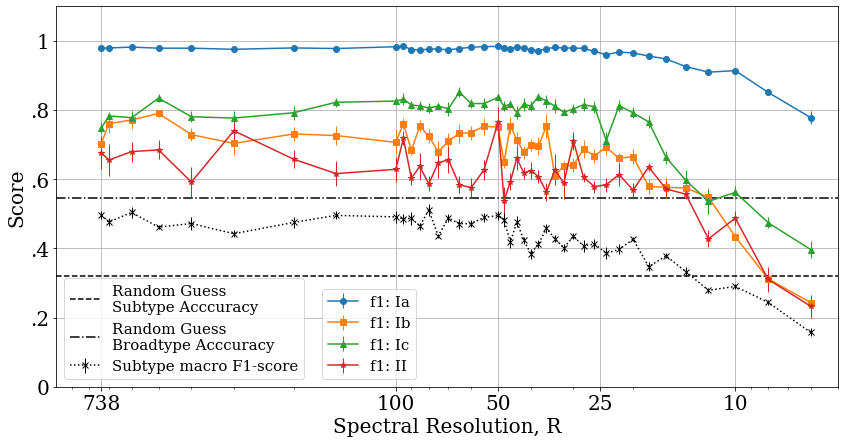

In [13]:
from matplotlib.legend import Legend

plt.rcParams["font.family"] = "serif"

fig, ax = getfig()

l1 = ax.axhline(y=random_guess, c="k", ls="--", label="Random Guess\nSubtype Acccuracy")

l2 = ax.axhline(y=bt_random_guess, c="k", ls="-.", label="Random Guess\nBroadtype Acccuracy")

l3 = add_line(ax, R_arr, mu, sd, "f1: Ia", label="Ia F1-Score", m="o")
l4 = add_line(ax, R_arr, mu, sd, "f1: Ib", label="Ib F1-Score", m="s")
l5 = add_line(ax, R_arr, mu, sd, "f1: Ic", label="Ic F1-Score", m="^")
l6 = add_line(ax, R_arr, mu, sd, "f1: II", label="II F1-Score", m="*")
l7 = add_line(ax, R_arr, mu, sd, "f1_STtst", label="Subtype macro F1-score", c="k", ls=":", m="x")

ax.legend([l1, l2, l7], ["Random Guess\nSubtype Acccuracy", "Random Guess\nBroadtype Acccuracy", "Subtype macro F1-score"], fontsize=15, loc="lower left")

leg = Legend(ax, [l3, l4, l5, l6], ["f1: Ia", "f1: Ib", "f1: Ic", "f1: II"], fontsize=15, loc="lower center", bbox_to_anchor=(0.4, 0))
ax.add_artist(leg)

ax.grid()

fig.savefig("f1score.pdf", bbox_inches="tight", pad_inches=0.1)
fig.show()

In [14]:
random_guess

0.3209297713035861

In [15]:
bt_random_guess

0.5472195662877013